In [7]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
from nistats.first_level_model import FirstLevelModel

In [9]:
import os

In [10]:
os.getcwd()

'/Users/gilles/Dropbox/Science/7t_binocular/hires_ODC_7T/notebooks'

In [11]:
import parameters

NameError: name 'sub_id' is not defined

In [2]:
from nilearn.input_data import NiftiMasker

In [18]:
data = '/Users/gilles/data/hires/055/sub-012/av/sub-012_EPI055_run-1_bold_volreg_sg_psc_av.nii.gz'

mcf = '/Users/gilles/data/hires/055/sub-012/mcf/sub-012_EPI055_run-1_bold_volreg.nii.gz'

mean_img = '/Users/gilles/data/hires/055/sub-012/reg/example_func.nii.gz'

In [23]:
masker = NiftiMasker(mask_strategy='epi')
masker.fit(mean_img)

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=None, mask_strategy='epi', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [24]:
from nilearn import plotting

In [25]:
%matplotlib inline

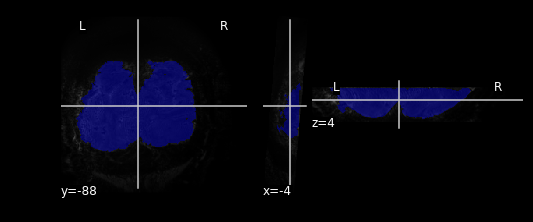

In [26]:
plotting.plot_roi(masker.mask_img_, '/Users/gilles/data/hires/055/sub-012/reg/example_func.nii.gz')

In [28]:
import pandas

In [29]:
design_matrix = pandas.read_csv('design_matrix_resolution-055_run-1.tsv', sep='\t')

In [31]:
design_matrix.head()

,Unnamed: 0,blue,no_stimulus,red,stimulus,drift_1,constant
0,0.0,-1.514150e-15,-4.243243e-15,-1.409227e-15,-2.792102e-15,-0.500000,1.0
1,6.5,-1.291910e-15,-2.140834e-15,1.324598e-01,1.324598e-01,-0.479592,1.0
2,13.0,-4.139078e-16,9.220169e-16,3.188751e-01,3.188751e-01,-0.459184,1.0
3,19.5,-6.261645e-16,5.080835e-18,2.644384e-01,2.644384e-01,-0.438776,1.0
4,26.0,-6.446406e-16,-6.280613e-17,2.600403e-01,2.600403e-01,-0.418367,1.0


In [33]:
first_level_model = FirstLevelModel(6.5, hrf_model='glover + derivative', mask=masker.mask_img_)
first_level_model.fit(data, design_matrices=design_matrix[['constant', 'red', 'blue', 'drift_1']])

/Users/gilles/anaconda3/lib/python3.6/site-packages/nistats-0.1.0-py3.6.egg/nistats/first_level_model.py:61: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


FirstLevelModel(drift_model='cosine', drift_order=1, fir_delays=[0],
        hrf_model='glover + derivative',
        mask=<nibabel.nifti1.Nifti1Image object at 0x11ed5a978>,
        memory=Memory(cachedir=None), memory_level=1, min_onset=-24,
        minimize_memory=True, n_jobs=1, noise_model='ar1', period_cut=128,
        signal_scaling=True, slice_time_ref=0.0, smoothing_fwhm=None,
        standardize=False, subject_label=None, t_r=6.5, target_affine=None,
        target_shape=None, verbose=0)

In [37]:
presentation = first_level_model.compute_contrast('red + blue')

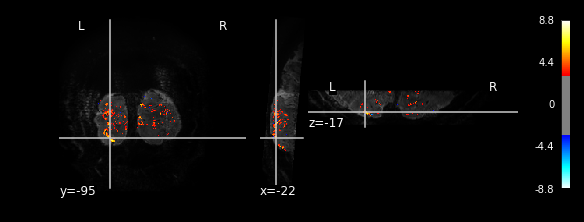

In [39]:
plotting.plot_stat_map(presentation, mean_img, threshold=3.1)

In [42]:
left_right = first_level_model.compute_contrast('red - blue')

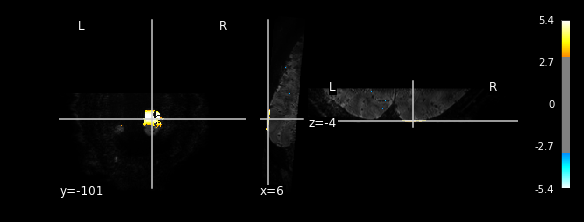

In [43]:
plotting.plot_stat_map(left_right, mean_img, threshold=3.1)

In [44]:
left_right.to_filename('left_right.nii.gz')

In [45]:
# Fixed effects


In [46]:
import glob

In [62]:
data = sorted(glob.glob('/Users/gilles/data/hires/055/sub-012/mcf/sub-012_EPI055_run-*_bold_volreg.nii.gz'))
design_matrices = [pandas.read_csv(fn, sep='\t')[['red', 'blue', 'constant', 'drift_1']] for fn in sorted(glob.glob('design_matrix_resolution-055_run-*.tsv'))]

In [63]:
first_level_model.fit(data, design_matrices=design_matrices)

/Users/gilles/anaconda3/lib/python3.6/site-packages/nistats-0.1.0-py3.6.egg/nistats/first_level_model.py:61: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


FirstLevelModel(drift_model='cosine', drift_order=1, fir_delays=[0],
        hrf_model='glover + derivative',
        mask=<nibabel.nifti1.Nifti1Image object at 0x11ed5a978>,
        memory=Memory(cachedir=None), memory_level=1, min_onset=-24,
        minimize_memory=True, n_jobs=1, noise_model='ar1', period_cut=128,
        signal_scaling=True, slice_time_ref=0.0, smoothing_fwhm=None,
        standardize=False, subject_label=None, t_r=6.5, target_affine=None,
        target_shape=None, verbose=0)

In [64]:
presentation = first_level_model.compute_contrast('red + blue')

/Users/gilles/anaconda3/lib/python3.6/site-packages/nistats-0.1.0-py3.6.egg/nistats/first_level_model.py:545: UserWarning: One contrast given, assuming it for all 5 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


In [65]:
presentation.to_filename('presentation_055_fe.nii.gz')

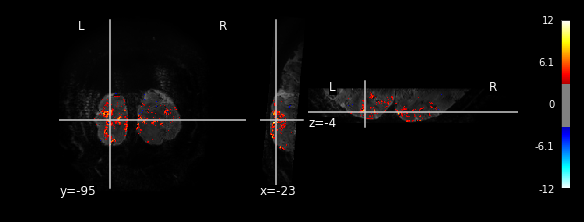

In [66]:
plotting.plot_stat_map(presentation, mean_img, threshold=3.1)

In [74]:
presentation = first_level_model.compute_contrast('drift_1')

/Users/gilles/anaconda3/lib/python3.6/site-packages/nistats-0.1.0-py3.6.egg/nistats/first_level_model.py:545: UserWarning: One contrast given, assuming it for all 5 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


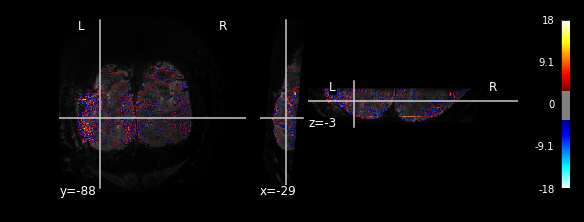

In [75]:
plotting.plot_stat_map(presentation, mean_img, threshold=3.1)

In [67]:
left_right = first_level_model.compute_contrast('red - blue')

/Users/gilles/anaconda3/lib/python3.6/site-packages/nistats-0.1.0-py3.6.egg/nistats/first_level_model.py:545: UserWarning: One contrast given, assuming it for all 5 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


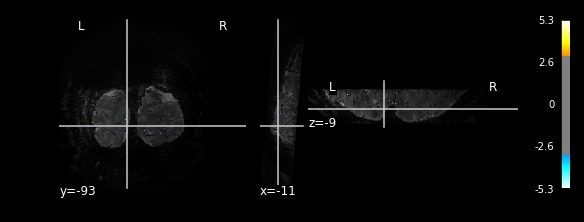

In [68]:
plotting.plot_stat_map(left_right, mean_img, threshold=3.1)

In [69]:
left_right.to_filename('red_blue_055_fe.nii.gz')

In [59]:
masker.mask_img_.to_filename('mask_055.nii.gz')

In [61]:
first_level_model.

In [78]:
first_level_model.

[{-0.55000000000000004: <nistats.regression.SimpleRegressionResults at 0x120602710>,
  -0.54000000000000004: <nistats.regression.SimpleRegressionResults at 0x120c37978>,
  -0.53000000000000003: <nistats.regression.SimpleRegressionResults at 0x120602a58>,
  -0.52000000000000002: <nistats.regression.SimpleRegressionResults at 0x15ab32860>,
  -0.51000000000000001: <nistats.regression.SimpleRegressionResults at 0x123e65278>,
  -0.5: <nistats.regression.SimpleRegressionResults at 0x1233681d0>,
  -0.48999999999999999: <nistats.regression.SimpleRegressionResults at 0x1233680f0>,
  -0.47999999999999998: <nistats.regression.SimpleRegressionResults at 0x122348da0>,
  -0.46999999999999997: <nistats.regression.SimpleRegressionResults at 0x1206023c8>,
  -0.46000000000000002: <nistats.regression.SimpleRegressionResults at 0x1204c0c50>,
  -0.45000000000000001: <nistats.regression.SimpleRegressionResults at 0x12108f208>,
  -0.44: <nistats.regression.SimpleRegressionResults at 0x12108fc88>,
  -0.429999